In [1]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_ndwi(green_band_path, nir_band_path):
    with rasterio.open(green_band_path) as green_band:
        green = green_band.read(1).astype('float32')
    with rasterio.open(nir_band_path) as nir_band:
        nir = nir_band.read(1).astype('float32')
    
    ndwi = (green - nir) / (green + nir)
    return ndwi

In [3]:
def classify_water(ndwi, threshold=0):
    water_mask = ndwi > threshold
    return water_mask

In [4]:
def count_water_pixels(water_mask):
    return np.sum(water_mask)

In [5]:
def calculate_water_proportion(years, baseline_year, image_paths):
    baseline_water_pixel_count = None
    water_pixel_counts = {}

    # Iterate through each year and process the images
    for year in years:
        green_band_path = image_paths['green'][year]
        nir_band_path = image_paths['nir'][year]
        
        # Calculate NDWI
        ndwi = calculate_ndwi(green_band_path, nir_band_path)
        water_mask = classify_water(ndwi)
        
        # Count water pixels
        water_pixel_count = count_water_pixels(water_mask)
        
        # Store water pixel counts
        if year == baseline_year:
            baseline_water_pixel_count = water_pixel_count
        
        water_pixel_counts[year] = water_pixel_count
    
    # Ensure we have the baseline year data
    if baseline_water_pixel_count is None:
        raise ValueError("Baseline year water pixel count is not available.")
    
    # Calculate water proportions relative to the baseline year
    water_proportions = {year: count / baseline_water_pixel_count for year, count in water_pixel_counts.items()}
    return water_proportions

C:\Users\zeeha\AppData\Local\Temp\ipykernel_21292\2493001624.py:7: RuntimeWarning: invalid value encountered in divide
  ndwi = (green - nir) / (green + nir)


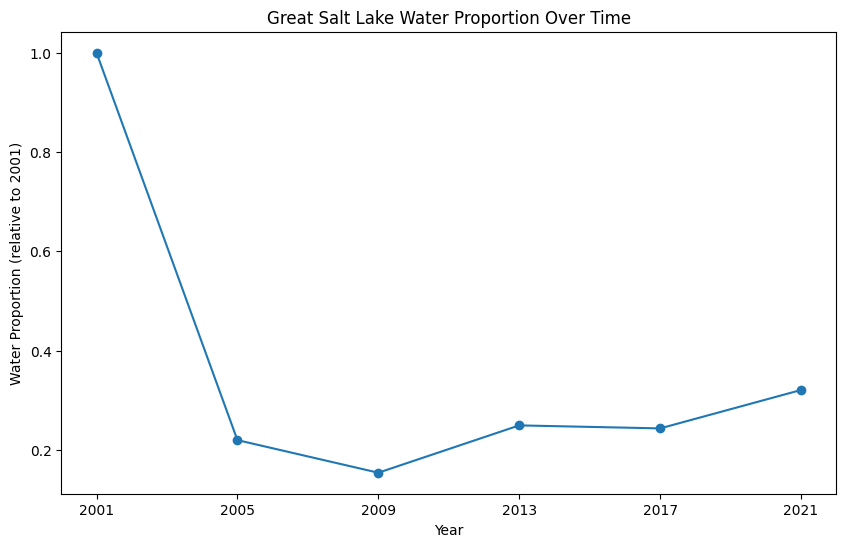

In [6]:
# Define years and paths
years = [2001,2005,2009,2013,2017,2021]
baseline_year = 2001

# Define paths to images
image_paths = {
    'green': {year: f"C:/Users/zeeha/OneDrive/Documents/NASA Job Application/Project/Data/Stitched Images/{year}_G.tif" for year in years},
    'nir': {year: f"C:/Users/zeeha/OneDrive/Documents/NASA Job Application/Project/Data/Stitched Images/{year}_NIR.tif" for year in years}
}

# Calculate water proportions
water_proportions = calculate_water_proportion(years, baseline_year, image_paths)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(water_proportions.keys(), water_proportions.values(), marker='o')
plt.xlabel('Year')
plt.ylabel('Water Proportion (relative to 2001)')
plt.title('Great Salt Lake Water Proportion Over Time')
plt.xticks(ticks=[2001, 2005, 2009, 2013, 2017, 2021])
plt.show() 